In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_mps = pd.read_csv('../data/MPS.csv', header=None)
df_xpu = pd.read_csv('../data/XPU.csv', header=None)

In [2]:
df_mps

,0
0,step 0 | loss: 10.947397 | lr 6.0000e-05 | ...
1,step 1 | loss: 9.502415 | lr 1.2000e-04 | n...
2,step 2 | loss: 9.248913 | lr 1.8000e-04 | n...
3,step 3 | loss: 9.763010 | lr 2.4000e-04 | n...
4,step 4 | loss: 9.104303 | lr 3.0000e-04 | n...
5,step 5 | loss: 8.794381 | lr 3.6000e-04 | n...
6,step 6 | loss: 8.586638 | lr 4.2000e-04 | n...
7,step 7 | loss: 8.265794 | lr 4.8000e-04 | n...
8,step 8 | loss: 7.887918 | lr 5.4000e-04 | n...
9,step 9 | loss: 7.519814 | lr 6.0000e-04 | n...


In [3]:
# parse the dataframe row which is a string in following format
# step    0 | loss: 10.947397 | lr 6.0000e-05 | norm: 28.5778 | dt: 6235.79ms | tokens/sec: 2627.41
def parse(series: pd.Series):
    series = series.str.extract(r'step\s+(\d+)\s+\|\s+loss:\s+([\d.]+)\s+\|\s+lr\s+([\d.e-]+)\s+\|\s+norm:\s+([\d.]+)\s+\|\s+dt:\s+([\d.]+)ms\s+\|\s+tokens/sec:\s+([\d.]+)')
    series.columns = ['step', 'loss', 'lr', 'norm', 'dt', 'tokens/sec']
    return series


In [4]:
# use df_mps, and parse function to get the parsed dataframe of mps 
# save the new dataframe to df_mps_parsed
df_mps_parsed = parse(df_mps[0])
df_xpu_parsed = parse(df_xpu[0])

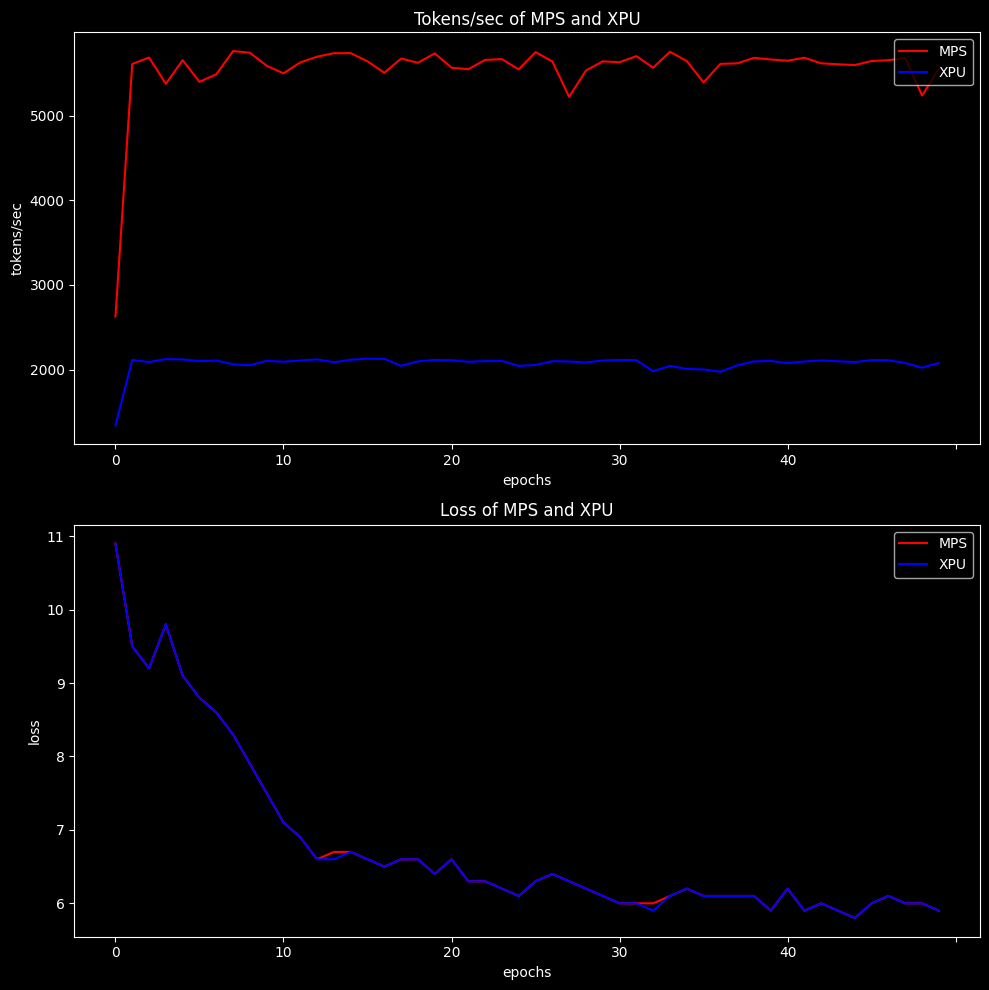

In [5]:
import matplotlib.pyplot as plt

# Create a figure with a size of (10, 10)
plt.figure(figsize=(10, 10))

# Create the first subplot for tokens/sec
plt.subplot(2, 1, 1)
plt.xticks(range(0, 100, 10))
plt.yticks(range(0, 8000, 1000))
plt.title('Tokens/sec of MPS and XPU')
plt.plot(df_mps_parsed['step'], df_mps_parsed['tokens/sec'].astype(float).round(1), color='red', label='MPS')
plt.plot(df_xpu_parsed['step'], df_xpu_parsed['tokens/sec'].astype(float).round(1), color='blue', label='XPU')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('tokens/sec')

# Create the second subplot for loss
plt.subplot(2, 1, 2)
plt.xticks(range(0, 100, 10))
plt.title('Loss of MPS and XPU')
plt.plot(df_mps_parsed['step'], df_mps_parsed['loss'].astype(float).round(1), color='red', label='MPS')
plt.plot(df_xpu_parsed['step'], df_xpu_parsed['loss'].astype(float).round(1), color='blue', label='XPU')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')

# Show the plots
plt.tight_layout()
plt.show()

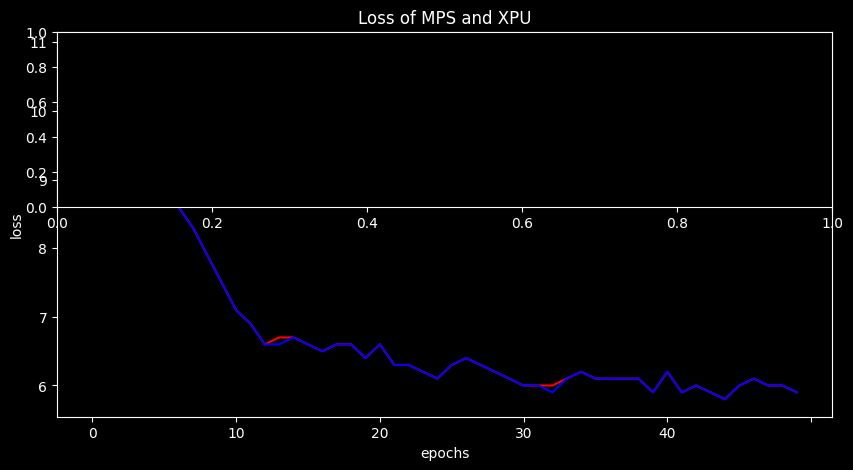

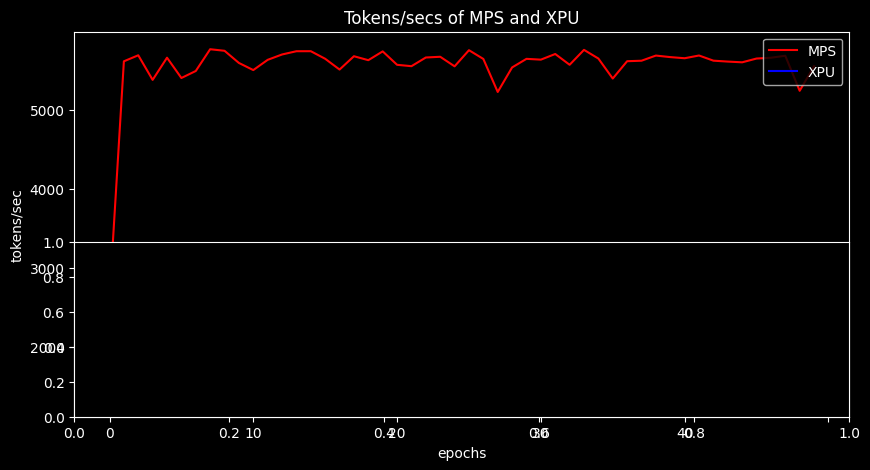

In [6]:
# create a subplot using matplotlib to show the loss of mps and xpu
# with the step on x-axis and loss on y-axis
# keep the loss of mps and xpu with only 1 decimal point
# set the title of the plot to be "Loss of MPS and XPU"
# put the both mps and xpu in the same plot
# set the color of mps to be red and xpu to be blue
# set the label of mps to be "MPS" and xpu to be "XPU"
# set the legend to be shown in the upper left corner
# set the x-axis ticks to be shown every 10 steps
# show lables for the both lines
# set the figure size to be (10, 5)

plt.figure(figsize=(10, 5))
plt.xticks(range(0, 100, 10))
plt.title('Loss of MPS and XPU')
plt.plot(df_mps_parsed['step'], df_mps_parsed['loss'].astype(float).round(1), color='red', label='MPS')
plt.plot(df_xpu_parsed['step'], df_xpu_parsed['loss'].astype(float).round(1), color='blue', label='XPU')
plt.legend(loc='upper right')
# show the x lable epochs and y lable loss
plt.xlabel('epochs')
plt.ylabel('loss')

# make the plot a subplot of a 2x1 grid
# set the first plot to be the loss plot
plt.subplot(2, 1, 1)

# create a subplot using matplotlib to show the tokens/sec of mps and xpu
plt.figure(figsize=(10, 5))
plt.xticks(range(0, 100, 10))
plt.yticks(range(0, 8000, 1000))
plt.title('Tokens/secs of MPS and XPU')
plt.plot(df_mps_parsed['step'], df_mps_parsed['tokens/sec'].astype(float).round(1), color='red', label='MPS')
plt.plot(df_xpu_parsed['step'], df_xpu_parsed['tokens/sec'].astype(float).round(1), color='blue', label='XPU')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('tokens/sec')

# set the second plot to be the tokens/sec plot
plt.subplot(2, 1, 2)

# put the two plots together
plt.show()


Text(0, 0.5, 'tokens/sec')

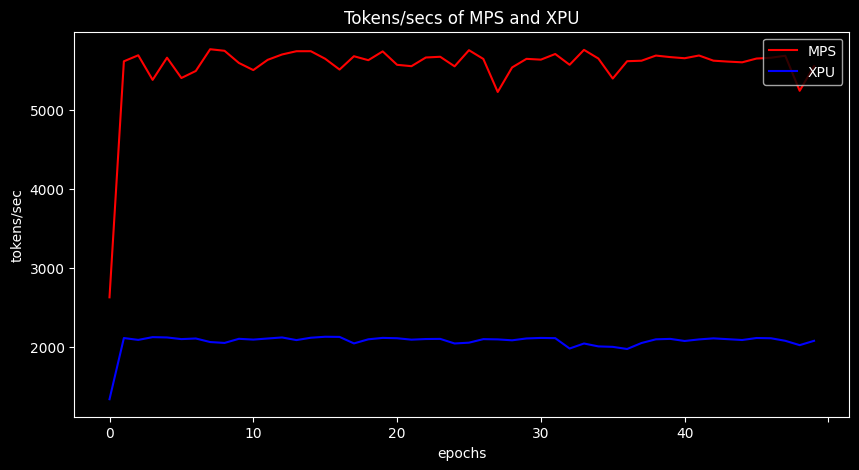

In [7]:
# show the y
plt.figure(figsize=(10, 5))
plt.xticks(range(0, 100, 10))
plt.yticks(range(0, 8000, 1000))
plt.title('Tokens/secs of MPS and XPU')
plt.plot(df_mps_parsed['step'], df_mps_parsed['tokens/sec'].astype(float).round(1), color='red', label='MPS')
plt.plot(df_xpu_parsed['step'], df_xpu_parsed['tokens/sec'].astype(float).round(1), color='blue', label='XPU')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('tokens/sec')